This dataset displays location for vehicles that have been towed and impounded by the City of Chicago within the last 90 days. Illegally parked vehicles, abandoned vehicles and vehicles used for illegal activities may be towed by the Chicago Police Department, the Department of Streets and Sanitation, the Department of Revenue, Aviation and the office of the City Clerk. 

Source: https://data.cityofchicago.org/Transportation/Towed-Vehicles/ygr5-vcbg

In [75]:
import json
import requests
import pandas as pd
from sodapy import Socrata
import matplotlib

In [76]:
client = Socrata("data.cityofchicago.org", None)
results = client.get("rp42-fxjt", limit=10000)

In [77]:
CarDataFrame = pd.DataFrame(results)
CarDataFrame

,color,inventory_number,make,model,plate,state,style,tow_date,tow_facility_phone,towed_to_address
0,WHI,6910993,FORD,NaN,ZZ88445,IL,LL,2018-01-21T00:00:00.000,(773) 265-7605,701 N. Sacramento
1,WHI,2842785,BUIC,NaN,Q637357,IL,4D,2018-02-03T00:00:00.000,(773) 568-8495,10300 S. Doty
2,RED,6913043,MERC,NaN,AB24458,IL,4D,2018-02-08T00:00:00.000,(773) 265-7605,701 N. Sacramento
3,SIL,6907687,SATU,NaN,AN84264,IL,LL,2017-12-24T00:00:00.000,(773) 265-7605,701 N. Sacramento
4,SIL,6912346,DODG,NaN,J273947,IL,4D,2018-02-01T00:00:00.000,(773) 265-7605,701 N. Sacramento
5,BLK,6908891,NISS,NaN,V639311,IL,4D,2018-01-05T00:00:00.000,(773) 265-7605,701 N. Sacramento
6,BLK,6913184,MERC,NaN,AG70937,IL,4D,2018-02-09T00:00:00.000,(773) 265-7605,701 N. Sacramento
7,SIL,6913177,LINC,NaN,AH26883,IL,4D,2018-02-09T00:00:00.000,(773) 265-7605,701 N. Sacramento
8,BLK,6908376,CHEV,BLZ,AH28024,IL,LL,2017-12-31T00:00:00.000,(773) 265-7605,701 N. Sacramento
9,GRY,6905802,CHEV,NaN,AB35372,IL,LL,2017-12-11T00:00:00.000,(773) 265-7605,701 N. Sacramento


In [78]:
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = [15, 8]

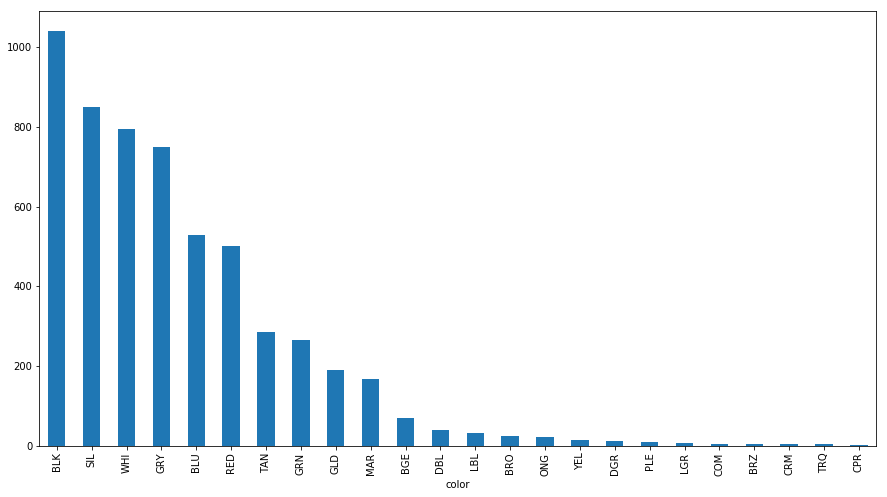

In [79]:
# Breakdown of towed cars by color of vehicle
Color = CarDataFrame.groupby('color')['color'].count()
Sorted_Color = Color.sort_values(ascending=False)
Sorted_Color.plot(kind='bar')

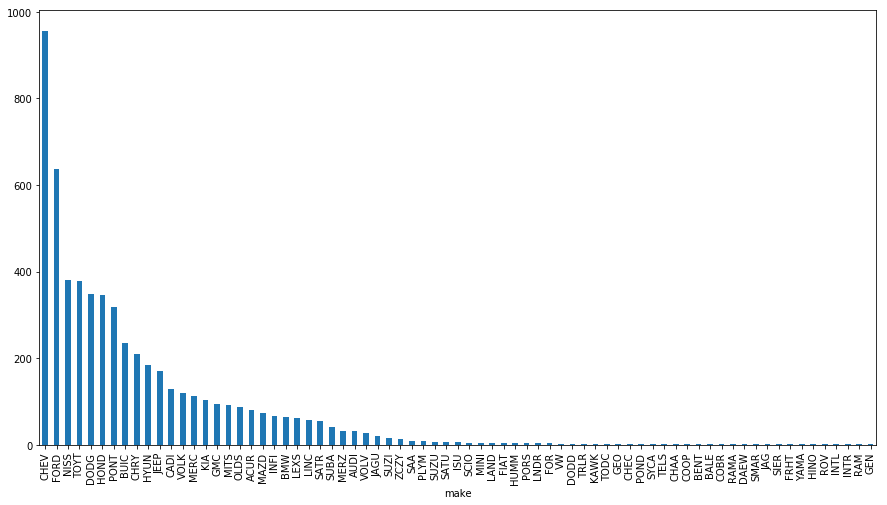

In [80]:
# Breakdown of towed cars by make of vehicle
Make = CarDataFrame.groupby('make')['make'].count()
Sorted_Make = Make.sort_values(ascending=False)
plt = Sorted_Make.plot(kind='bar')

In [81]:
# Top 10 cars towed by license plate
Plate = CarDataFrame.groupby('plate')['plate'].count()
Sorted_Plate = Plate.sort_values(ascending=False)
Sorted_Plate[0:10]

plate
AH32682    2
Z316644    2
ZZ99554    1
AJ82761    1
AJ80420    1
AJ80424    1
AJ81251    1
AJ81429    1
AJ81484    1
AJ82723    1
Name: plate, dtype: int64

In [82]:
# Top 10 states of towed cars
State = CarDataFrame.groupby('state')['state'].count()
Sorted_State = State.sort_values(ascending=False)
Sorted_State[0:10]

state
IL    5056
IN     138
WI      51
TX      31
IA      29
MN      27
MI      18
TN      13
FL      12
OH      10
Name: state, dtype: int64

In [84]:
# Addresses where cars were towed
Address = CarDataFrame.groupby('towed_to_address')['towed_to_address'].count()
Sorted_Address = Address.sort_values(ascending=False)
Sorted_Address

towed_to_address
701 N. Sacramento                                     3097
10300 S. Doty                                         2491
400 E. Lower Wacker                                     53
Chicago O'hare International Airport remote lot E.       9
Police Pound                                             1
Name: towed_to_address, dtype: int64

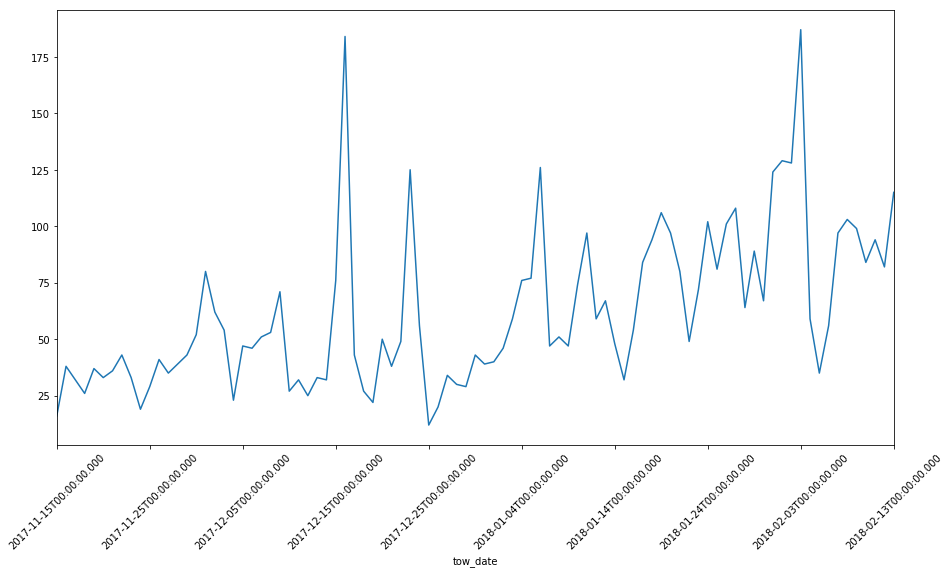

In [91]:
# Towing by tow date
TowDate = CarDataFrame.groupby('tow_date')['tow_date'].count()
TowDate.plot(rot=45)